In [9]:
using Plots, BenchmarkTools, LinearAlgebra, LaTeXStrings

In [30]:
function ode_euler(
    fp::Function,
    t1::Real, 
    x1::Real,
    Npoints::Integer, 
    h = 1.0e-6)
    
    tn = t1 .+ collect(0:1:(Npoints-1)) * h
    xn = zero(tn)
    xn[1] = x1
    for i in 1:(Npoints-1)
        xn[i+1] = xn[i] + fp(tn[i], xn[i])* h
    end
    return tn, xn
end

function ode_euler(
    fp::Function, 
    t1::Real, 
    x1::Vector{<:Real}, 
    Npoints::Integer, 
    h = 1.0e-6)
    
    tn = t1 .+ collect(0:1:(Npoints-1)) * h
    xn = zeros((length(x1), length(tn)))
    xn[:,1] = x1
    for i in 1:(Npoints-1)
        xn[:, i+1] = xn[:, i] .+ fp(tn[i], xn[:, i]).*h
    end
    return tn, xn
end

ode_euler (generic function with 6 methods)

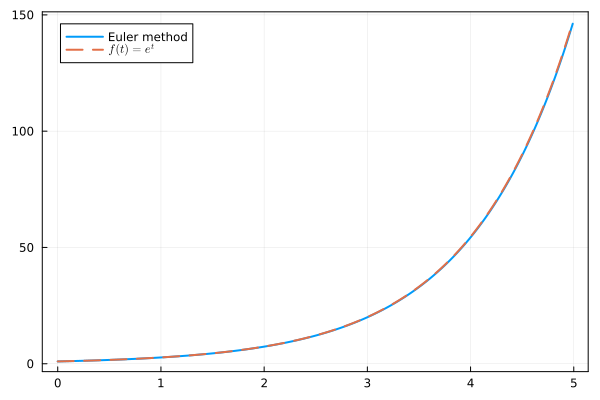

In [31]:
tn, xn = ode_euler((t, x)->exp(t), 0.0, 1.0, 500, 1.0e-2)
plot(tn, xn, lw = 2, frame = :box, label = "Euler method")#, dpi=300)
plot!(tn, exp.(tn), lw=2, ls = :dash, label = L"f(t) = e^t")

In [60]:
function butterfly3d(v, σ::Real, ρ::Real, β::Real)
    return [σ*(v[2]-v[1]), v[1]*(ρ - v[3])-v[2], v[1]*v[2]-β*v[3]]
end
tn, xn = ode_euler((t, v)->butterfly3d(v, 10, 28, 8/3), 0.0, [0.0, 1.0, 1.0], 4000, 1.0e-2)

butterfly3d (generic function with 2 methods)

In [95]:
tn, xn = ode_euler((t, v)->butterfly3d(v, 10, 28, 8/3), 0.0, [0.0, 1.0, 1.0], 4000, 1.0e-2)


([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  39.9, 39.910000000000004, 39.92, 39.93, 39.94, 39.95, 39.96, 39.97, 39.980000000000004, 39.99], [0.0 0.1 … -1.0576156095000662 -1.42349588288557; 1.0 0.99 … -4.716418343355104 -4.696645427580902; 1.0 0.9733333333333334 … 25.410092342311664 24.78237145645867])

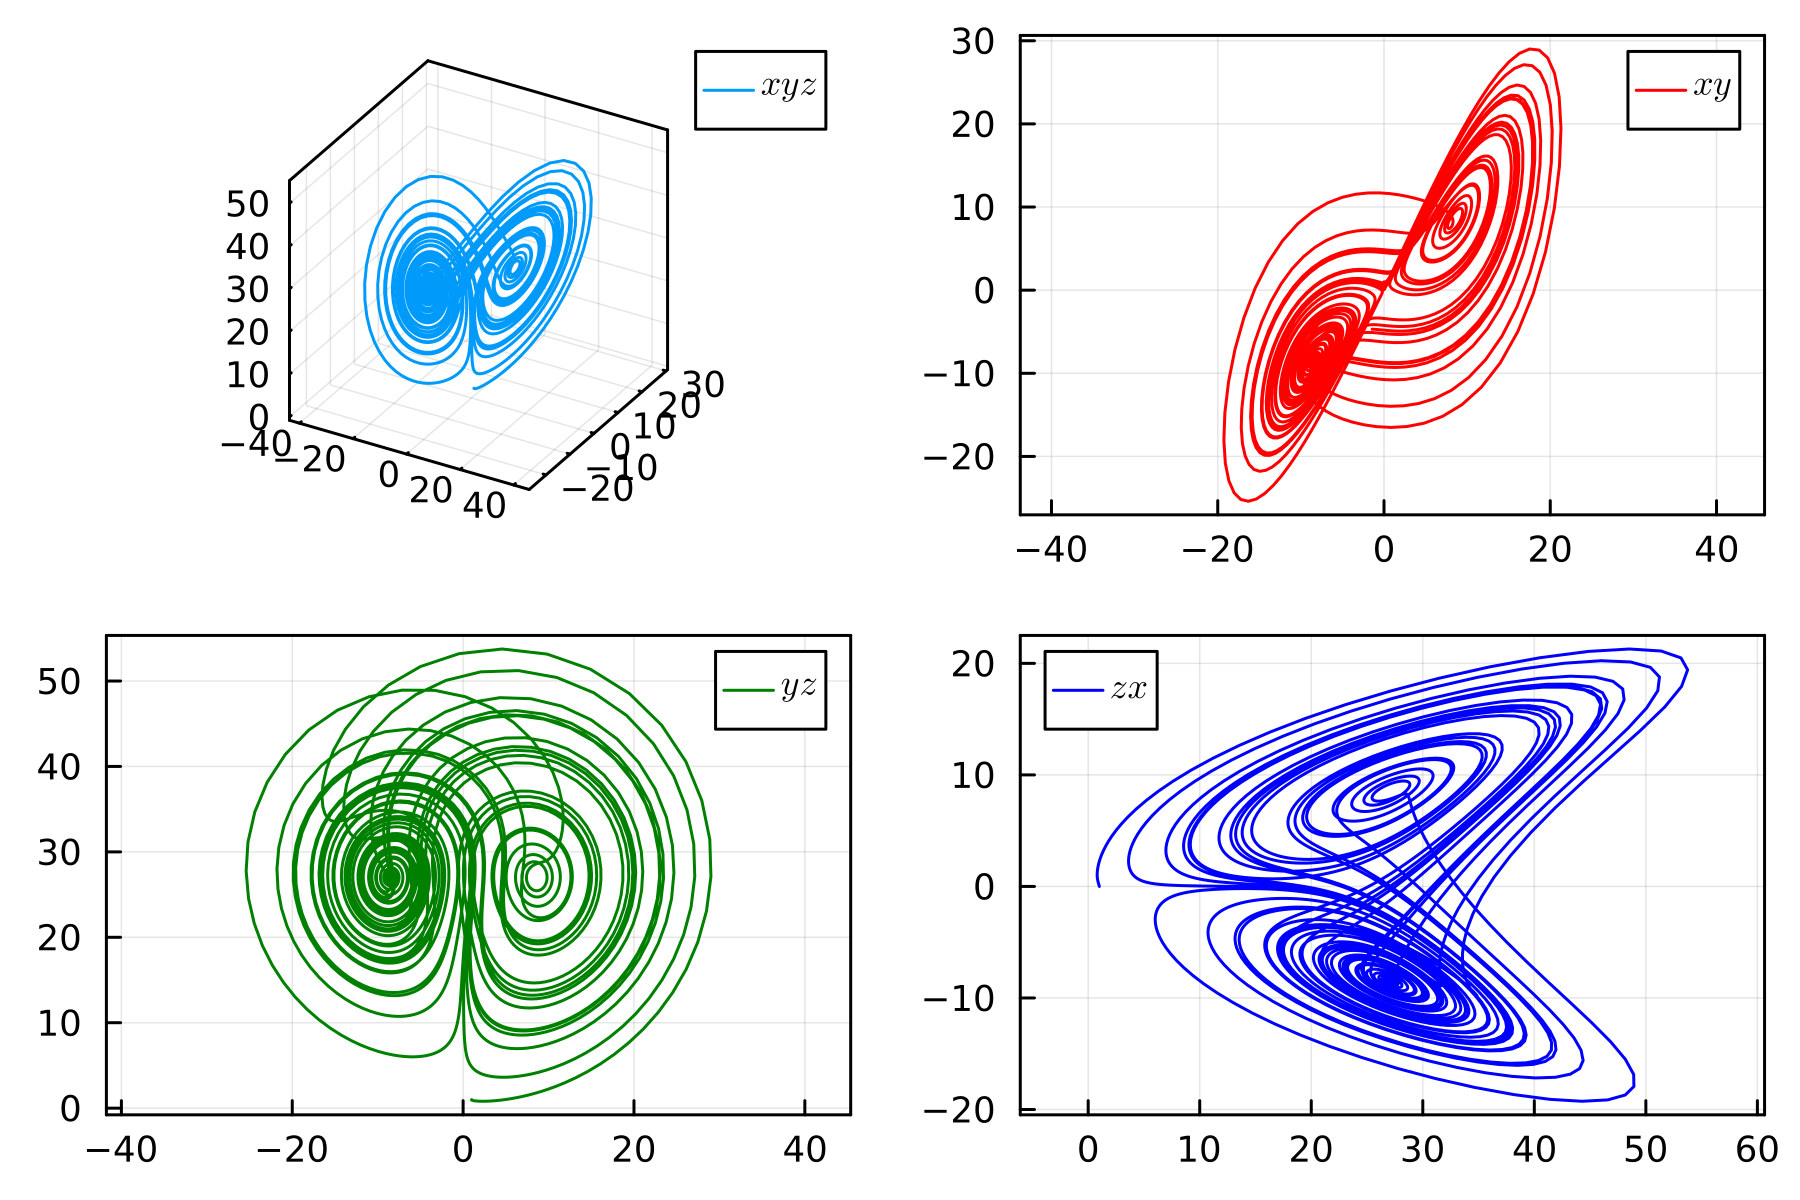

In [99]:
p0 = plot(xn[1,:], xn[2,:], xn[3,:], frame=:box, aspect_ratio=1.0, label=L"xyz", dpi=300)
p1 = plot(xn[1,:], xn[2,:], frame=:box, aspect_ratio=1.0, label=L"xy", color=:red)
p2 = plot(xn[2,:], xn[3,:], frame=:box, aspect_ratio=1.0, label=L"yz", color=:green)
p3 = plot(xn[3,:], xn[1,:], frame=:box, aspect_ratio=1.0, label=L"zx", color=:blue)

plot!(p0, p1, p2, p3, layout=4)
#savefig("lorentz.png")

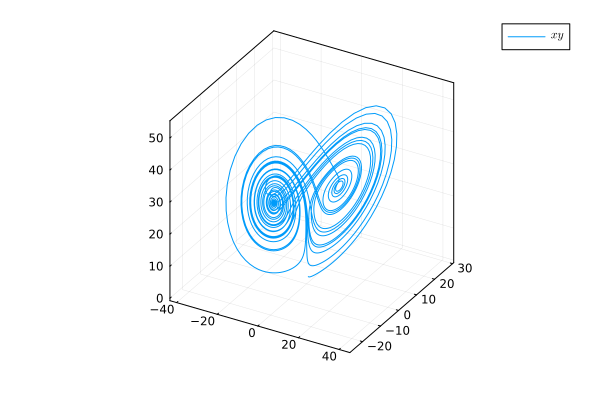

In [91]:
p1 = plot(xn[1,:], xn[2,:], xn[3,:], frame=:box, aspect_ratio=1.0, label=L"xy")

In [306]:
function sho1d(y::Vector{<:Real}, k::Real, x0=0.0)
    return [y[2], -k*(y[1]-x0)]
end

function sho2d(y::Vector{<:Real}, k::Real, r0=3.0)
    r = norm(y[1:2])
    θ = atan(y[2], y[1])
    return [y[3], y[4], -k*(r-r0)*cos(θ), -k*(r-r0)*sin(θ)]
end



sho2d (generic function with 2 methods)

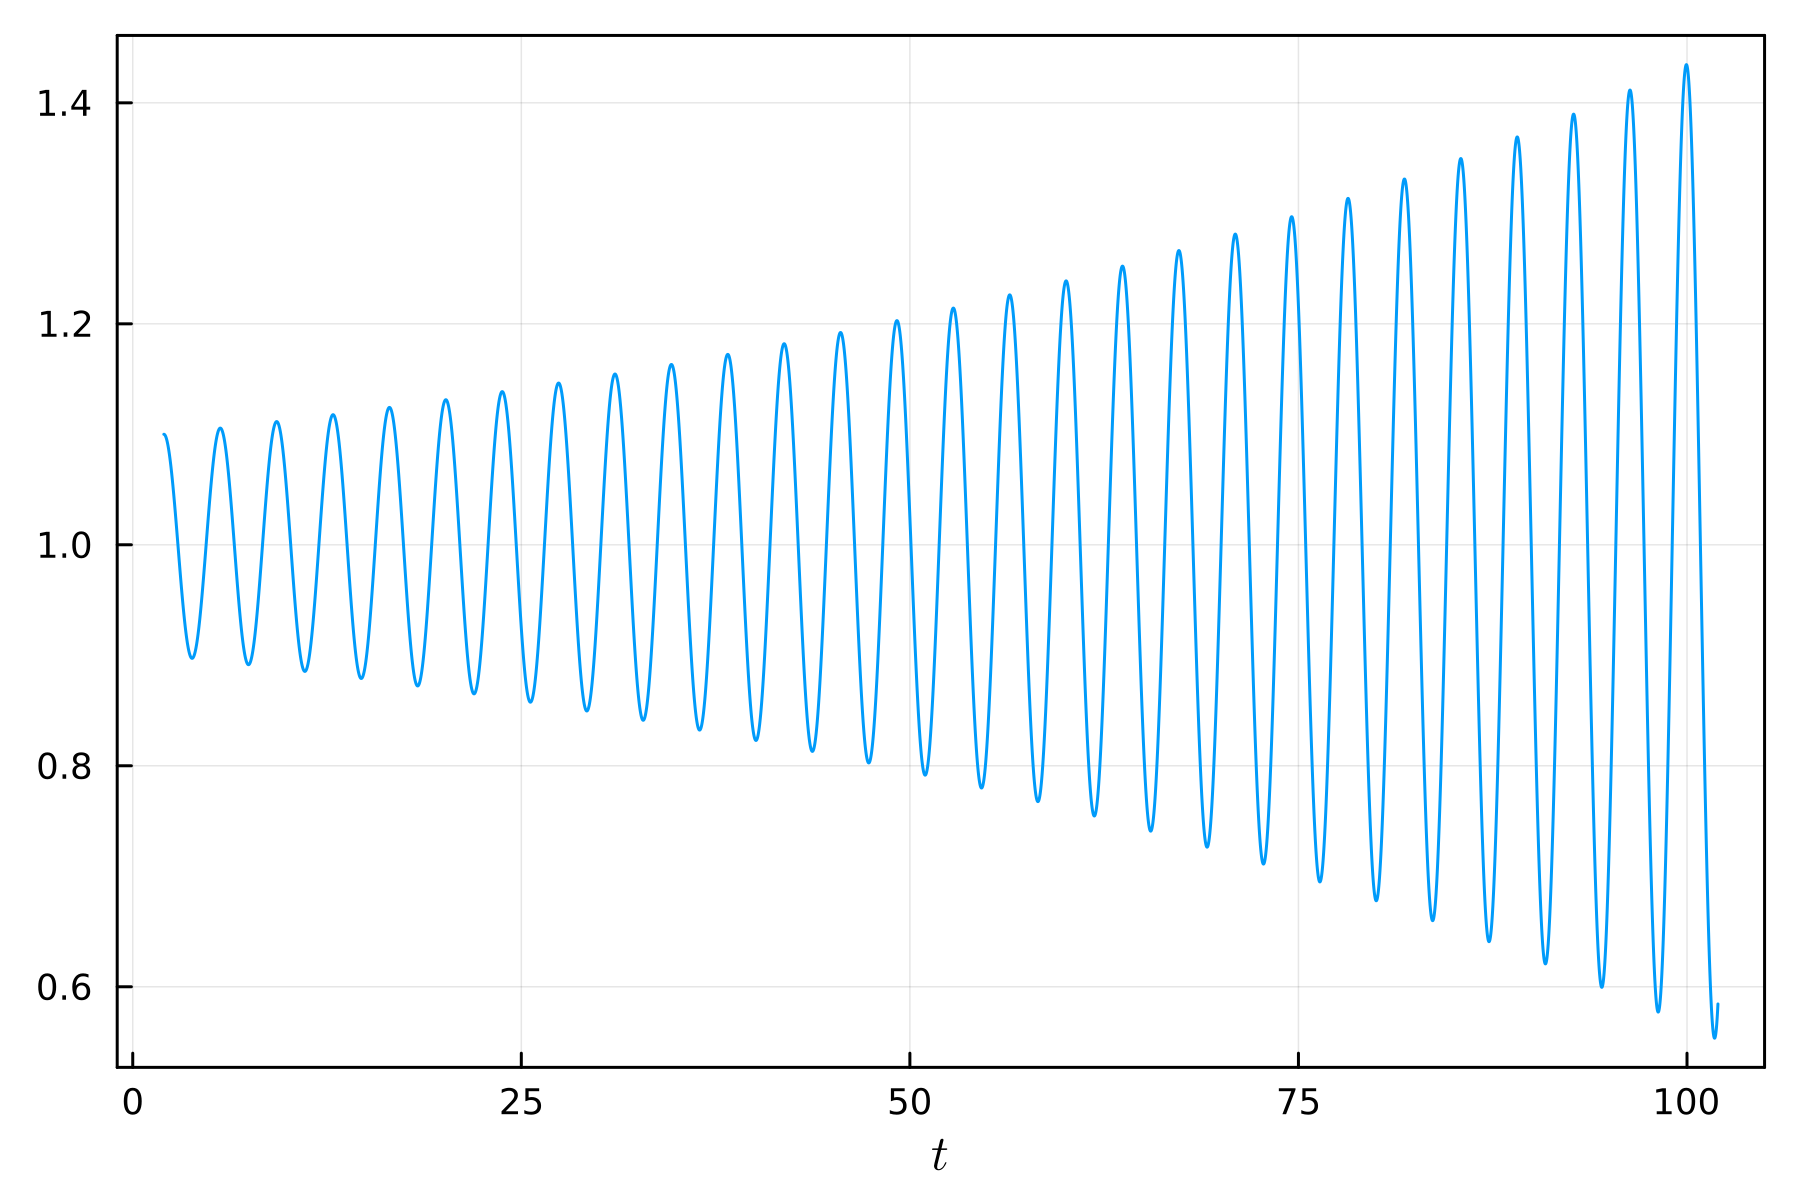

In [317]:
tn, xn = ode_euler((t, y)->sho1d(y, 3, 1.0), 2.0, [1.1, 0.0], 10000, 1.0e-2)
plot(tn, xn[1,: ], label = :none, xlabel = L"t", frame = :box, dpi=300)
# savefig("euler_sho1d.png")

In [310]:
tn, xn = ode_euler((t, y)->sho2d(y, 0.3, 1), 0.0, [1, √2, 1.0, 0.0], 100000, 1.0e-2)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  999.9, 999.91, 999.9200000000001, 999.9300000000001, 999.94, 999.95, 999.96, 999.97, 999.98, 999.99], [1.0 1.01 … -0.7641252208102569 -0.7971358709246533; 1.4142135623730951 1.4142135623730951 … -3.2299632420136732 -3.2413799647947723; 1.0 0.9987320508075689 … -3.3010650114396376 -3.2994632936808435; 0.0 -0.0017931509443361074 … -1.1416722781099065 -1.1349018047056916])

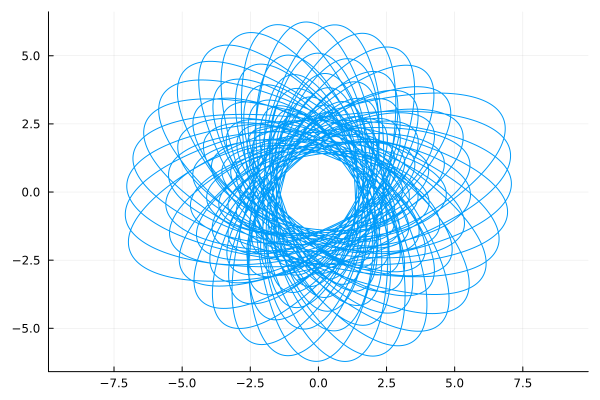

In [311]:
plot(xn[1,:], xn[2,: ], label = :none, aspect_ratio = :equal)

In [274]:
yy=[3.1, π, 0.0, -0.0]

4-element Vector{Float64}:
  3.1
  3.141592653589793
  0.0
 -0.0

In [289]:
atan(0, 1)

0.0

In [276]:
sqrt(3.1^2+π^2)

4.413570482170797